In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn import svm

In [2]:
def split(strt,fnsh,df):
    X_test = df['text'].iloc[strt:fnsh]
    y_test = df['label'].iloc[strt:fnsh].astype('int')
    df = df.drop(df.index[strt:fnsh])
    X_train = df['text']
    y_train = df['label'].astype('int')    
    return X_train, X_test, y_train, y_test

In [3]:
def classifier(df,distance_name,k_neighbor):
    print("Nama distance=",distance_name)
    print("Jumlah K tetangga=",k_neighbor)
    spl = [0,108,216,324,432,540,648,756,864,972,1080]
    tempspl,acc_score,pre_score,rec_score,f_score = [],[],[],[],[]
    i = 0
    akurasimax=0
    while (i<len(spl)-1):
#         --------------Split-------------------
        if len(spl)-2 != len(tempspl):
            X_train, X_test, y_train, y_test = split(spl[i],spl[i+2],df)
            tempspl.append(spl[i])
    #   ketika array[i+2] == null (looping terakhir)
        elif (len(spl)-len(tempspl)) == 2:
    #       split last and first
            X_test1 = df['text'].iloc[spl[i]:spl[i+1]]
            y_test1 = df['label'].iloc[spl[i]:spl[i+1]].astype('int')
            X_test2 = df['text'].iloc[tempspl[0]:tempspl[1]]
            y_test2 = df['label'].iloc[tempspl[0]:tempspl[1]].astype('int')
    #       concat last and first
            X_test = pd.concat([X_test1, X_test2], axis=0)
            y_test = pd.concat([y_test1, y_test2], axis=0)
    #       split except last and first
            X_train = df['text'].iloc[tempspl[1]:tempspl[len(tempspl)-1]]
            y_train = df['label'].iloc[tempspl[1]:tempspl[len(tempspl)-1]].astype('int')
        
#         --------------Pembobotan TF-ID-------------------
        vectorizer = TfidfVectorizer(min_df=3, dtype=np.double, norm='l2', sublinear_tf=True)
#         vectorizer = TfidfVectorizer()
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)

#         --------------CLasifier KNN-------------------        
        modelknn = KNeighborsClassifier(n_neighbors=k_neighbor, weights='distance', metric=distance_name)
#         modelknn = svm.SVC()
        modelknn.fit(X_train,y_train)
        y_pred = modelknn.predict(X_test)
#         print(classification_report(y_test,y_pred))
        akurasi = modelknn.score(X_test, y_test)
        precision = precision_score(y_test,y_pred,average='weighted', labels=np.unique(y_pred))
        recall = recall_score(y_test, y_pred, average='weighted')
        f1score = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
        acc_score.append(akurasi)
        pre_score.append(precision)
        rec_score.append(recall)
        f_score.append(f1score)
        print("Fold ke-",i+1,"Akurasi =","{:.4f}".format(akurasi),
              "Precision =","{:.4f}".format(precision),
              "Recall =","{:.4f}".format(recall),
              "F1-Score =","{:.4f}".format(f1score))
        if (akurasi >= akurasimax):
            akurasimax = akurasi
            foldke = i+1
        i+=1
    avg_acc_score = sum(acc_score)/10
    avg_acc_score = sum(acc_score)/10
    avg_precision_score = sum(pre_score)/10
    avg_recall_score = sum(rec_score)/10
    avg_f1_score = sum(f_score)/10
    print("Avg accuracy =","{:.4f}".format(avg_acc_score),
          "Avg precision=","{:.4f}".format(avg_precision_score),
          "Avg recall=","{:.4f}".format(avg_recall_score),
          "Avg f1 Score=","{:.4f}".format(avg_f1_score))
#     print('Avg accuracy : {}'.format(avg_acc_score))
    print("Akurasi terbaik adalah",akurasimax,"pada fold ke-",foldke)
    print("------------------------------------")
    return akurasimax

In [4]:
df = pd.read_pickle(r'D:\JupyterNotebook\DataProcess\preprocess_SWsastrawi_stemming.pkl')
dfNo = pd.read_pickle(r'D:\JupyterNotebook\DataProcess\preprocess_SWsastrawi_nostemming.pkl')

Dengan Stemming
Nama distance= euclidean
Jumlah K tetangga= 1
Fold ke- 1 Akurasi = 0.1065 Precision = 0.6810 Recall = 0.1065 F1-Score = 0.1123
Fold ke- 2 Akurasi = 0.6204 Precision = 0.6217 Recall = 0.6204 F1-Score = 0.6086
Fold ke- 3 Akurasi = 0.6157 Precision = 0.6255 Recall = 0.6157 F1-Score = 0.6087
Fold ke- 4 Akurasi = 0.1806 Precision = 0.8593 Recall = 0.1806 F1-Score = 0.2140
Fold ke- 5 Akurasi = 0.2130 Precision = 0.8440 Recall = 0.2130 F1-Score = 0.2956
Fold ke- 6 Akurasi = 0.1991 Precision = 0.8667 Recall = 0.1991 F1-Score = 0.2364
Fold ke- 7 Akurasi = 0.1991 Precision = 0.7966 Recall = 0.1991 F1-Score = 0.2229
Fold ke- 8 Akurasi = 0.1852 Precision = 0.6268 Recall = 0.1852 F1-Score = 0.2019
Fold ke- 9 Akurasi = 0.1806 Precision = 0.6864 Recall = 0.1806 F1-Score = 0.2303
Fold ke- 10 Akurasi = 0.1435 Precision = 0.7510 Recall = 0.1435 F1-Score = 0.1938
Avg accuracy = 0.2644 Avg precision= 0.7359 Avg recall= 0.2644 Avg f1 Score= 0.2924
Akurasi terbaik adalah 0.6203703703703703 p

Fold ke- 1 Akurasi = 0.0880 Precision = 0.5419 Recall = 0.0880 F1-Score = 0.1299
Fold ke- 2 Akurasi = 0.1111 Precision = 0.8476 Recall = 0.1111 F1-Score = 0.1298
Fold ke- 3 Akurasi = 0.1389 Precision = 0.8765 Recall = 0.1389 F1-Score = 0.1491
Fold ke- 4 Akurasi = 0.1250 Precision = 0.8859 Recall = 0.1250 F1-Score = 0.1358
Fold ke- 5 Akurasi = 0.1157 Precision = 0.7715 Recall = 0.1157 F1-Score = 0.2069
Fold ke- 6 Akurasi = 0.1435 Precision = 0.8156 Recall = 0.1435 F1-Score = 0.1542
Fold ke- 7 Akurasi = 0.1389 Precision = 0.7985 Recall = 0.1389 F1-Score = 0.1885
Fold ke- 8 Akurasi = 0.1389 Precision = 0.7611 Recall = 0.1389 F1-Score = 0.1681
Fold ke- 9 Akurasi = 0.1296 Precision = 0.7745 Recall = 0.1296 F1-Score = 0.1648
Fold ke- 10 Akurasi = 0.1111 Precision = 0.7366 Recall = 0.1111 F1-Score = 0.1284
Avg accuracy = 0.1241 Avg precision= 0.7810 Avg recall= 0.1241 Avg f1 Score= 0.1556
Akurasi terbaik adalah 0.14351851851851852 pada fold ke- 6
------------------------------------
Dengan St

Fold ke- 1 Akurasi = 0.1065 Precision = 0.6810 Recall = 0.1065 F1-Score = 0.1123
Fold ke- 2 Akurasi = 0.6204 Precision = 0.6217 Recall = 0.6204 F1-Score = 0.6086
Fold ke- 3 Akurasi = 0.6157 Precision = 0.6255 Recall = 0.6157 F1-Score = 0.6087
Fold ke- 4 Akurasi = 0.1806 Precision = 0.8593 Recall = 0.1806 F1-Score = 0.2140
Fold ke- 5 Akurasi = 0.2130 Precision = 0.8440 Recall = 0.2130 F1-Score = 0.2956
Fold ke- 6 Akurasi = 0.1991 Precision = 0.8667 Recall = 0.1991 F1-Score = 0.2364
Fold ke- 7 Akurasi = 0.1991 Precision = 0.7966 Recall = 0.1991 F1-Score = 0.2229
Fold ke- 8 Akurasi = 0.1852 Precision = 0.6268 Recall = 0.1852 F1-Score = 0.2019
Fold ke- 9 Akurasi = 0.1806 Precision = 0.6864 Recall = 0.1806 F1-Score = 0.2303
Fold ke- 10 Akurasi = 0.1435 Precision = 0.7510 Recall = 0.1435 F1-Score = 0.1938
Avg accuracy = 0.2644 Avg precision= 0.7359 Avg recall= 0.2644 Avg f1 Score= 0.2924
Akurasi terbaik adalah 0.6203703703703703 pada fold ke- 2
------------------------------------
Dengan Ste

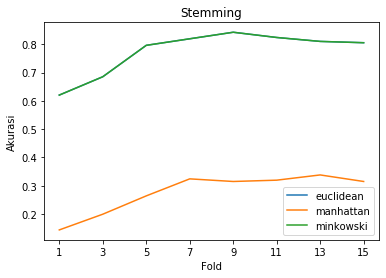

Tanpa Stemming
Nama distance= euclidean
Jumlah K tetangga= 1
Fold ke- 1 Akurasi = 0.1019 Precision = 0.8170 Recall = 0.1019 F1-Score = 0.1155
Fold ke- 2 Akurasi = 0.6065 Precision = 0.6089 Recall = 0.6065 F1-Score = 0.6003
Fold ke- 3 Akurasi = 0.5880 Precision = 0.6034 Recall = 0.5880 F1-Score = 0.5836
Fold ke- 4 Akurasi = 0.1481 Precision = 0.8433 Recall = 0.1481 F1-Score = 0.1702
Fold ke- 5 Akurasi = 0.1667 Precision = 0.8864 Recall = 0.1667 F1-Score = 0.2301
Fold ke- 6 Akurasi = 0.1713 Precision = 0.8325 Recall = 0.1713 F1-Score = 0.2107
Fold ke- 7 Akurasi = 0.1713 Precision = 0.7665 Recall = 0.1713 F1-Score = 0.1958
Fold ke- 8 Akurasi = 0.1667 Precision = 0.8091 Recall = 0.1667 F1-Score = 0.1905
Fold ke- 9 Akurasi = 0.1574 Precision = 0.8030 Recall = 0.1574 F1-Score = 0.2098
Fold ke- 10 Akurasi = 0.1296 Precision = 0.7369 Recall = 0.1296 F1-Score = 0.1838
Avg accuracy = 0.2407 Avg precision= 0.7707 Avg recall= 0.2407 Avg f1 Score= 0.2690
Akurasi terbaik adalah 0.6064814814814815 pa

Fold ke- 1 Akurasi = 0.0880 Precision = 0.5419 Recall = 0.0880 F1-Score = 0.1299
Fold ke- 2 Akurasi = 0.0926 Precision = 0.5211 Recall = 0.0926 F1-Score = 0.0916
Fold ke- 3 Akurasi = 0.1019 Precision = 0.6810 Recall = 0.1019 F1-Score = 0.0965
Fold ke- 4 Akurasi = 0.1204 Precision = 0.8695 Recall = 0.1204 F1-Score = 0.1400
Fold ke- 5 Akurasi = 0.1111 Precision = 0.6952 Recall = 0.1111 F1-Score = 0.2405
Fold ke- 6 Akurasi = 0.1296 Precision = 0.8431 Recall = 0.1296 F1-Score = 0.1310
Fold ke- 7 Akurasi = 0.1296 Precision = 0.8221 Recall = 0.1296 F1-Score = 0.1661
Fold ke- 8 Akurasi = 0.1343 Precision = 0.8697 Recall = 0.1343 F1-Score = 0.1797
Fold ke- 9 Akurasi = 0.1204 Precision = 0.6812 Recall = 0.1204 F1-Score = 0.1586
Fold ke- 10 Akurasi = 0.1019 Precision = 0.6171 Recall = 0.1019 F1-Score = 0.1137
Avg accuracy = 0.1130 Avg precision= 0.7142 Avg recall= 0.1130 Avg f1 Score= 0.1448
Akurasi terbaik adalah 0.13425925925925927 pada fold ke- 8
------------------------------------
Tanpa Ste

Fold ke- 1 Akurasi = 0.1019 Precision = 0.8170 Recall = 0.1019 F1-Score = 0.1155
Fold ke- 2 Akurasi = 0.6065 Precision = 0.6089 Recall = 0.6065 F1-Score = 0.6003
Fold ke- 3 Akurasi = 0.5880 Precision = 0.6034 Recall = 0.5880 F1-Score = 0.5836
Fold ke- 4 Akurasi = 0.1481 Precision = 0.8433 Recall = 0.1481 F1-Score = 0.1702
Fold ke- 5 Akurasi = 0.1667 Precision = 0.8864 Recall = 0.1667 F1-Score = 0.2301
Fold ke- 6 Akurasi = 0.1713 Precision = 0.8325 Recall = 0.1713 F1-Score = 0.2107
Fold ke- 7 Akurasi = 0.1713 Precision = 0.7665 Recall = 0.1713 F1-Score = 0.1958
Fold ke- 8 Akurasi = 0.1667 Precision = 0.8091 Recall = 0.1667 F1-Score = 0.1905
Fold ke- 9 Akurasi = 0.1574 Precision = 0.8030 Recall = 0.1574 F1-Score = 0.2098
Fold ke- 10 Akurasi = 0.1296 Precision = 0.7369 Recall = 0.1296 F1-Score = 0.1838
Avg accuracy = 0.2407 Avg precision= 0.7707 Avg recall= 0.2407 Avg f1 Score= 0.2690
Akurasi terbaik adalah 0.6064814814814815 pada fold ke- 2
------------------------------------
Tanpa Stem

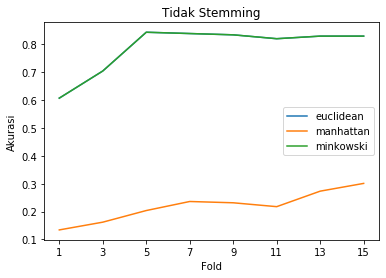

Lama Proses 322.0301282405853 seconds
Wall time: 5min 22s


In [5]:
%%time
start_time = time.time()
dfcount = [df,dfNo]
distancecount = ['euclidean','manhattan','minkowski']
kcount = [1,3,5,7,9,11,13,15]
for x in range(2):
    arrd1 = []
    arrd2 = []
    arrd3 = []
    for y in range(len(distancecount)):
        maxresult = []
        for z in range(len(kcount)):
            if x==0:
                print('Dengan Stemming')
            else:
                print('Tanpa Stemming')
            tempmax= classifier(dfcount[x],distancecount[y],kcount[z])
            maxresult.append(tempmax)
            if y==0:
                arrd1.append(tempmax)
            elif y==1:
                arrd2.append(tempmax)
            elif y==2:
                arrd3.append(tempmax)
    plt.plot(kcount, arrd1, label = "euclidean")
    plt.plot(kcount, arrd2, label = "manhattan")
    plt.plot(kcount, arrd3, label = "minkowski")
    plt.xticks(kcount)
    if x==0:
        plt.title("Stemming")
    else:
        plt.title("Tidak Stemming")
    plt.xlabel('Fold')
    plt.ylabel('Akurasi')
    plt.legend()
    plt.pause(0.05)
plt.show
print("Lama Proses %s seconds" % (time.time() - start_time))

In [6]:
df = pd.read_pickle(r'D:\JupyterNotebook\DataProcess\preprocess_SWnltk_stemming.pkl')
dfNo = pd.read_pickle(r'D:\JupyterNotebook\DataProcess\preprocess_SWnltk_nostemming.pkl')

Dengan Stemming
Nama distance= euclidean
Jumlah K tetangga= 1
Fold ke- 1 Akurasi = 0.1111 Precision = 0.6552 Recall = 0.1111 F1-Score = 0.1107
Fold ke- 2 Akurasi = 0.6019 Precision = 0.5948 Recall = 0.6019 F1-Score = 0.5937
Fold ke- 3 Akurasi = 0.6204 Precision = 0.6331 Recall = 0.6204 F1-Score = 0.6145
Fold ke- 4 Akurasi = 0.1991 Precision = 0.8814 Recall = 0.1991 F1-Score = 0.2280
Fold ke- 5 Akurasi = 0.2269 Precision = 0.8627 Recall = 0.2269 F1-Score = 0.3242
Fold ke- 6 Akurasi = 0.2083 Precision = 0.8697 Recall = 0.2083 F1-Score = 0.2448
Fold ke- 7 Akurasi = 0.2083 Precision = 0.7967 Recall = 0.2083 F1-Score = 0.2366
Fold ke- 8 Akurasi = 0.2037 Precision = 0.6604 Recall = 0.2037 F1-Score = 0.2307
Fold ke- 9 Akurasi = 0.1852 Precision = 0.6865 Recall = 0.1852 F1-Score = 0.2383
Fold ke- 10 Akurasi = 0.1481 Precision = 0.7510 Recall = 0.1481 F1-Score = 0.2041
Avg accuracy = 0.2713 Avg precision= 0.7392 Avg recall= 0.2713 Avg f1 Score= 0.3025
Akurasi terbaik adalah 0.6203703703703703 p

Fold ke- 1 Akurasi = 0.0880 Precision = 0.5419 Recall = 0.0880 F1-Score = 0.1299
Fold ke- 2 Akurasi = 0.1204 Precision = 0.6764 Recall = 0.1204 F1-Score = 0.1091
Fold ke- 3 Akurasi = 0.1435 Precision = 0.8618 Recall = 0.1435 F1-Score = 0.1582
Fold ke- 4 Akurasi = 0.1343 Precision = 0.8860 Recall = 0.1343 F1-Score = 0.1564
Fold ke- 5 Akurasi = 0.1435 Precision = 0.8481 Recall = 0.1435 F1-Score = 0.2286
Fold ke- 6 Akurasi = 0.1574 Precision = 0.8435 Recall = 0.1574 F1-Score = 0.1826
Fold ke- 7 Akurasi = 0.1574 Precision = 0.8226 Recall = 0.1574 F1-Score = 0.2290
Fold ke- 8 Akurasi = 0.1389 Precision = 0.7611 Recall = 0.1389 F1-Score = 0.1681
Fold ke- 9 Akurasi = 0.1296 Precision = 0.7745 Recall = 0.1296 F1-Score = 0.1648
Fold ke- 10 Akurasi = 0.1111 Precision = 0.7366 Recall = 0.1111 F1-Score = 0.1284
Avg accuracy = 0.1324 Avg precision= 0.7752 Avg recall= 0.1324 Avg f1 Score= 0.1655
Akurasi terbaik adalah 0.1574074074074074 pada fold ke- 7
------------------------------------
Dengan Ste

Fold ke- 1 Akurasi = 0.1111 Precision = 0.6552 Recall = 0.1111 F1-Score = 0.1107
Fold ke- 2 Akurasi = 0.6019 Precision = 0.5948 Recall = 0.6019 F1-Score = 0.5937
Fold ke- 3 Akurasi = 0.6204 Precision = 0.6331 Recall = 0.6204 F1-Score = 0.6145
Fold ke- 4 Akurasi = 0.1991 Precision = 0.8814 Recall = 0.1991 F1-Score = 0.2280
Fold ke- 5 Akurasi = 0.2269 Precision = 0.8627 Recall = 0.2269 F1-Score = 0.3242
Fold ke- 6 Akurasi = 0.2083 Precision = 0.8697 Recall = 0.2083 F1-Score = 0.2448
Fold ke- 7 Akurasi = 0.2083 Precision = 0.7967 Recall = 0.2083 F1-Score = 0.2366
Fold ke- 8 Akurasi = 0.2037 Precision = 0.6604 Recall = 0.2037 F1-Score = 0.2307
Fold ke- 9 Akurasi = 0.1852 Precision = 0.6865 Recall = 0.1852 F1-Score = 0.2383
Fold ke- 10 Akurasi = 0.1481 Precision = 0.7510 Recall = 0.1481 F1-Score = 0.2041
Avg accuracy = 0.2713 Avg precision= 0.7392 Avg recall= 0.2713 Avg f1 Score= 0.3025
Akurasi terbaik adalah 0.6203703703703703 pada fold ke- 3
------------------------------------
Dengan Ste

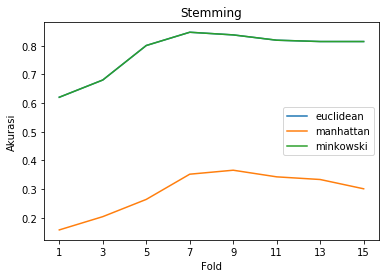

Tanpa Stemming
Nama distance= euclidean
Jumlah K tetangga= 1
Fold ke- 1 Akurasi = 0.1019 Precision = 0.8170 Recall = 0.1019 F1-Score = 0.1155
Fold ke- 2 Akurasi = 0.6435 Precision = 0.6509 Recall = 0.6435 F1-Score = 0.6376
Fold ke- 3 Akurasi = 0.6296 Precision = 0.6388 Recall = 0.6296 F1-Score = 0.6244
Fold ke- 4 Akurasi = 0.1713 Precision = 0.8592 Recall = 0.1713 F1-Score = 0.1958
Fold ke- 5 Akurasi = 0.1991 Precision = 0.8624 Recall = 0.1991 F1-Score = 0.2716
Fold ke- 6 Akurasi = 0.1806 Precision = 0.8517 Recall = 0.1806 F1-Score = 0.2271
Fold ke- 7 Akurasi = 0.1898 Precision = 0.7762 Recall = 0.1898 F1-Score = 0.2250
Fold ke- 8 Akurasi = 0.1759 Precision = 0.7093 Recall = 0.1759 F1-Score = 0.2069
Fold ke- 9 Akurasi = 0.1667 Precision = 0.7140 Recall = 0.1667 F1-Score = 0.2027
Fold ke- 10 Akurasi = 0.1343 Precision = 0.7746 Recall = 0.1343 F1-Score = 0.1727
Avg accuracy = 0.2593 Avg precision= 0.7654 Avg recall= 0.2593 Avg f1 Score= 0.2879
Akurasi terbaik adalah 0.6435185185185185 pa

Fold ke- 1 Akurasi = 0.0880 Precision = 0.5419 Recall = 0.0880 F1-Score = 0.1299
Fold ke- 2 Akurasi = 0.1065 Precision = 0.6810 Recall = 0.1065 F1-Score = 0.1123
Fold ke- 3 Akurasi = 0.1296 Precision = 0.8542 Recall = 0.1296 F1-Score = 0.1289
Fold ke- 4 Akurasi = 0.1250 Precision = 0.8696 Recall = 0.1250 F1-Score = 0.1524
Fold ke- 5 Akurasi = 0.1250 Precision = 0.8478 Recall = 0.1250 F1-Score = 0.1732
Fold ke- 6 Akurasi = 0.1435 Precision = 0.8432 Recall = 0.1435 F1-Score = 0.1583
Fold ke- 7 Akurasi = 0.1435 Precision = 0.8445 Recall = 0.1435 F1-Score = 0.1813
Fold ke- 8 Akurasi = 0.1389 Precision = 0.8697 Recall = 0.1389 F1-Score = 0.1920
Fold ke- 9 Akurasi = 0.1204 Precision = 0.6812 Recall = 0.1204 F1-Score = 0.1586
Fold ke- 10 Akurasi = 0.1019 Precision = 0.6171 Recall = 0.1019 F1-Score = 0.1137
Avg accuracy = 0.1222 Avg precision= 0.7650 Avg recall= 0.1222 Avg f1 Score= 0.1501
Akurasi terbaik adalah 0.14351851851851852 pada fold ke- 7
------------------------------------
Tanpa Ste

Fold ke- 1 Akurasi = 0.1019 Precision = 0.8170 Recall = 0.1019 F1-Score = 0.1155
Fold ke- 2 Akurasi = 0.6435 Precision = 0.6509 Recall = 0.6435 F1-Score = 0.6376
Fold ke- 3 Akurasi = 0.6296 Precision = 0.6388 Recall = 0.6296 F1-Score = 0.6244
Fold ke- 4 Akurasi = 0.1713 Precision = 0.8592 Recall = 0.1713 F1-Score = 0.1958
Fold ke- 5 Akurasi = 0.1991 Precision = 0.8624 Recall = 0.1991 F1-Score = 0.2716
Fold ke- 6 Akurasi = 0.1806 Precision = 0.8517 Recall = 0.1806 F1-Score = 0.2271
Fold ke- 7 Akurasi = 0.1898 Precision = 0.7762 Recall = 0.1898 F1-Score = 0.2250
Fold ke- 8 Akurasi = 0.1759 Precision = 0.7093 Recall = 0.1759 F1-Score = 0.2069
Fold ke- 9 Akurasi = 0.1667 Precision = 0.7140 Recall = 0.1667 F1-Score = 0.2027
Fold ke- 10 Akurasi = 0.1343 Precision = 0.7746 Recall = 0.1343 F1-Score = 0.1727
Avg accuracy = 0.2593 Avg precision= 0.7654 Avg recall= 0.2593 Avg f1 Score= 0.2879
Akurasi terbaik adalah 0.6435185185185185 pada fold ke- 2
------------------------------------
Tanpa Stem

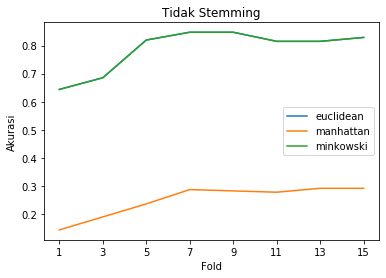

Lama Proses 266.7430245876312 seconds
Wall time: 4min 26s


In [7]:
%%time
start_time = time.time()
dfcount = [df,dfNo]
distancecount = ['euclidean','manhattan','minkowski']
kcount = [1,3,5,7,9,11,13,15]
for x in range(2):
    arrd1 = []
    arrd2 = []
    arrd3 = []
    for y in range(len(distancecount)):
        maxresult = []
        for z in range(len(kcount)):
            if x==0:
                print('Dengan Stemming')
            else:
                print('Tanpa Stemming')
            tempmax= classifier(dfcount[x],distancecount[y],kcount[z])
            maxresult.append(tempmax)
            if y==0:
                arrd1.append(tempmax)
            elif y==1:
                arrd2.append(tempmax)
            elif y==2:
                arrd3.append(tempmax)
    plt.plot(kcount, arrd1, label = "euclidean")
    plt.plot(kcount, arrd2, label = "manhattan")
    plt.plot(kcount, arrd3, label = "minkowski")
    plt.xticks(kcount)
    if x==0:
        plt.title("Stemming")
    else:
        plt.title("Tidak Stemming")
    plt.xlabel('Fold')
    plt.ylabel('Akurasi')
    plt.legend()
    plt.pause(0.05)
plt.show
print("Lama Proses %s seconds" % (time.time() - start_time))